<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/knn_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Surowy KNN przewiduje klasę: 1
Scikit-learn KNN przewiduje klasę: 1


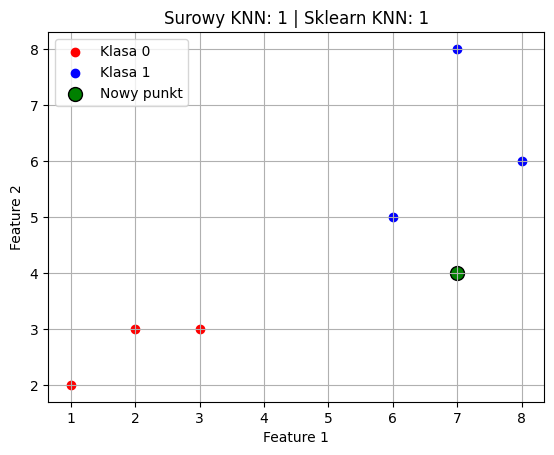

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 1. Dane treningowe
X_train = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 6]])  # Punkty
y_train = np.array([0, 0, 0, 1, 1, 1])  # Klasy: 0 - czerwone, 1 - niebieskie

# 2. Nowy punkt do klasyfikacji
new_point = np.array([7, 4])

# 3. Surowa implementacja KNN
def knn_custom(X_train, y_train, new_point, k):
    from scipy.spatial import distance
    distances = [distance.euclidean(new_point, point) for point in X_train]
    neighbors = sorted(zip(distances, y_train))
    k_nearest = neighbors[:k]
    classes = [label for _, label in k_nearest]
    predicted_class = max(set(classes), key=classes.count)
    return predicted_class

# 4. Klasyfikacja za pomocą surowej implementacji
k = 3
predicted_class_custom = knn_custom(X_train, y_train, new_point, k)

# 5. Klasyfikacja za pomocą scikit-learn
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
predicted_class_sklearn = knn_model.predict([new_point])[0]

# 6. Wyświetlanie wyników
print(f"Surowy KNN przewiduje klasę: {predicted_class_custom}")
print(f"Scikit-learn KNN przewiduje klasę: {predicted_class_sklearn}")

# 7. Wizualizacja
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Klasa 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Klasa 1')
plt.scatter(new_point[0], new_point[1], color='green', label='Nowy punkt', s=100, edgecolor='black')
plt.legend()
plt.title(f"Surowy KNN: {predicted_class_custom} | Sklearn KNN: {predicted_class_sklearn}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()
